# STEP 33단계 뉴턴 방법으로 푸는 최적화(자동계산)

## 33.1 2차 미분 계산하기

In [1]:
import numpy as np
from dezero import Variable

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

x = Variable(np.array(2.0))
y = f(x)
y.backward(create_graph=True)
print(x.grad) # y' = 4x^3 -4x = 24

gx = x.grad
gx.backward()
print(x.grad) # y'' = 12x^2 - 4 = 44
# STEP 14에서 같은 변수 반복을 처리하기 위해 추가했던 아래 코드 때문임
# if x.grad is None:
#     x.grad = gx
# else:
#     x.grad = grad + gx

variable(24.0)
variable(68.0)


In [2]:
import numpy as np
from dezero import Variable

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

x = Variable(np.array(2.0))
y = f(x)
y.backward(create_graph=True)
print(x.grad) # y' = 4x^3 -4x = 24

gx = x.grad
x.cleargrad()
gx.backward()
print(x.grad) # 근데 왜 x에서 꺼낼까? 아래 그림에서 확인

variable(24.0)
variable(44.0)


* ![계산그래프](../../images/그림%2031-5.png)

## 33.2 뉴턴 방법을 활용한 최적화

In [3]:
import numpy as np
from dezero import Variable

In [4]:
def f(x):
    y = x**4 - 2*x**2
    return y

In [5]:
x = Variable(np.array(2.0))
iters = 10
for i in range(iters):
    print(i, x)
    y =  f(x)
    x.cleargrad()
    y.backward(create_graph=True)

    gx = x.grad
    x.cleargrad()
    gx.backward()
    gx2 = x.grad

    x.data -= gx.data / gx2.data

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


In [6]:
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (1 - x0) ** 2
    return y

In [7]:
import matplotlib.pyplot as plt

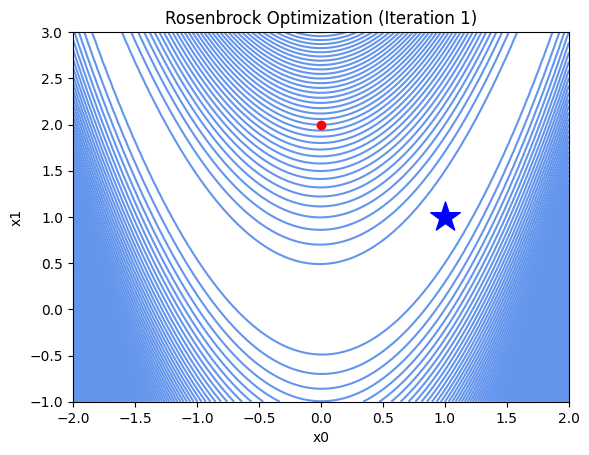

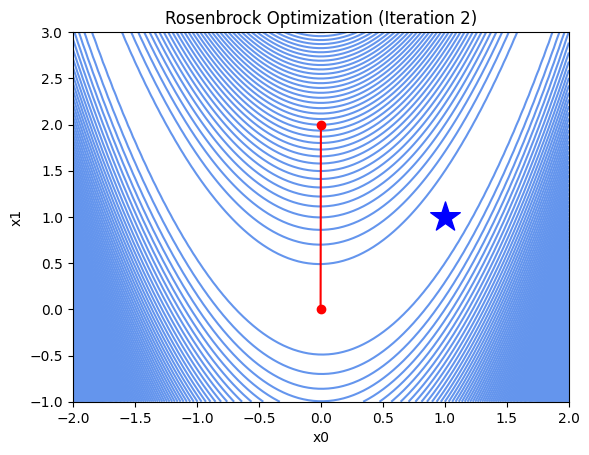

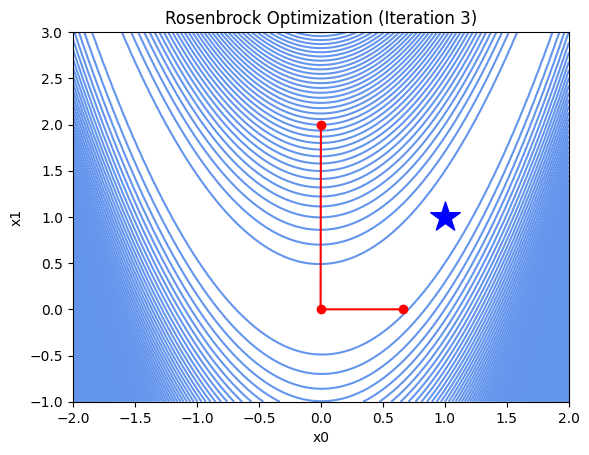

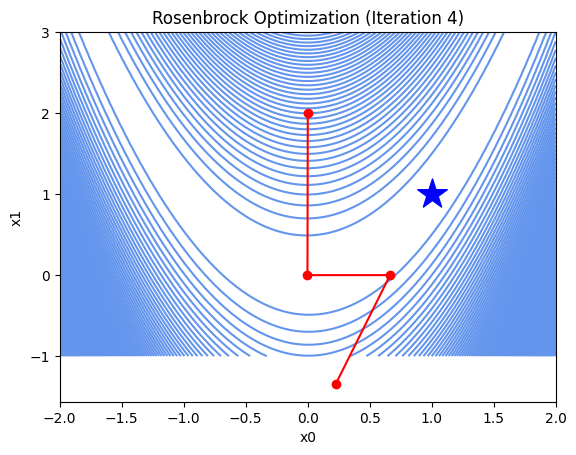

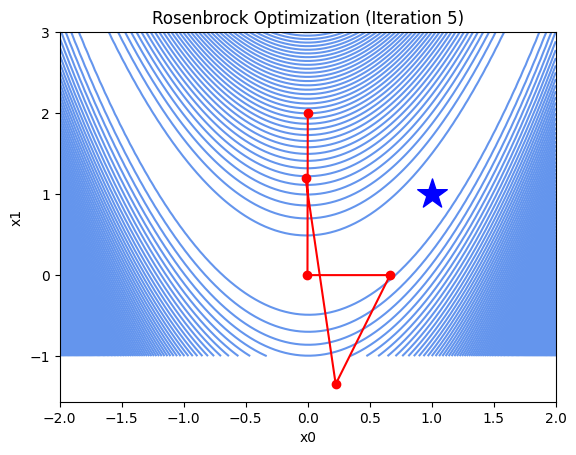

In [15]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
iters = 5
log_interval = 200
x0_history = []
x1_history = []
for i in range(iters):
    # print(i, x0, x1)
    x0_history.append(x0.data.item())
    x1_history.append(x1.data.item())
    y =  rosenbrock(x0, x1)
    x0.cleargrad()
    x1.cleargrad()
    y.backward(create_graph=True)

    gx0 = x0.grad
    x0.cleargrad()
    gx1 = x1.grad
    x1.cleargrad()

    gx0.backward()
    gx1.backward()

    gx0_2 = x0.grad
    gx1_2 = x1.grad


    x0.data -= gx0.data / gx0_2.data
    x1.data -= gx1.data / gx1_2.data

    # if i <10: #i % log_interval ==0 or i==2:
    # 그래프 업데이트
    plt.clf()
    # Rosenbrock 함수의 등고선 플롯만 그리기
    x0_range = np.linspace(-2, 2, 100)
    x1_range = np.linspace(-1, 3, 100)
    X0,X1= np.meshgrid(x0_range, x1_range)
    Y = rosenbrock(Variable(X0), Variable(X1))
    plt.contour(X0, X1, Y.data, levels=100, colors='cornflowerblue')

    # 현재 포인트 표시 및 선으로 연결
    plt.scatter([1.0], [1.0],marker="*", color="blue",s=500) # plotting single point
    plt.plot(x0_history, x1_history, "ro-",)
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.title(f'Rosenbrock Optimization (Iteration {i+1})')

    plt.pause(0.01)  # 잠시 멈춤

* STEP 29 뉴턴 그림 참고
    * ![뉴턴](../../images/그림%2029-1.png)

In [9]:
from dezero.utils import plot_dot_graph

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

# print(i, x0, x1)
x0_history.append(x0.data.item())
x1_history.append(x1.data.item())
y =  rosenbrock(x0, x1)
x0.cleargrad()
x1.cleargrad()
y.backward(create_graph=True)

gx0 = x0.grad
x0.cleargrad()
gx1 = x1.grad
x1.cleargrad()

gx0.backward()
gx1.backward()

gx0_2 = x0.grad
gx1_2 = x1.grad


x0.data -= gx0.data / gx0_2.data
x1.data -= gx1.data / gx1_2.data


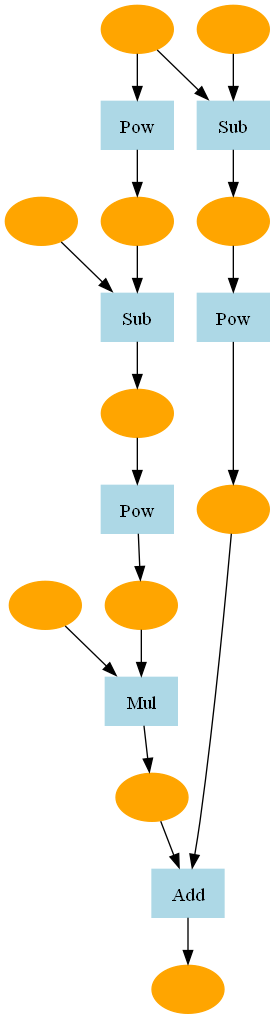

In [10]:
plot_dot_graph(y, verbose=False, to_file='rogen.png')

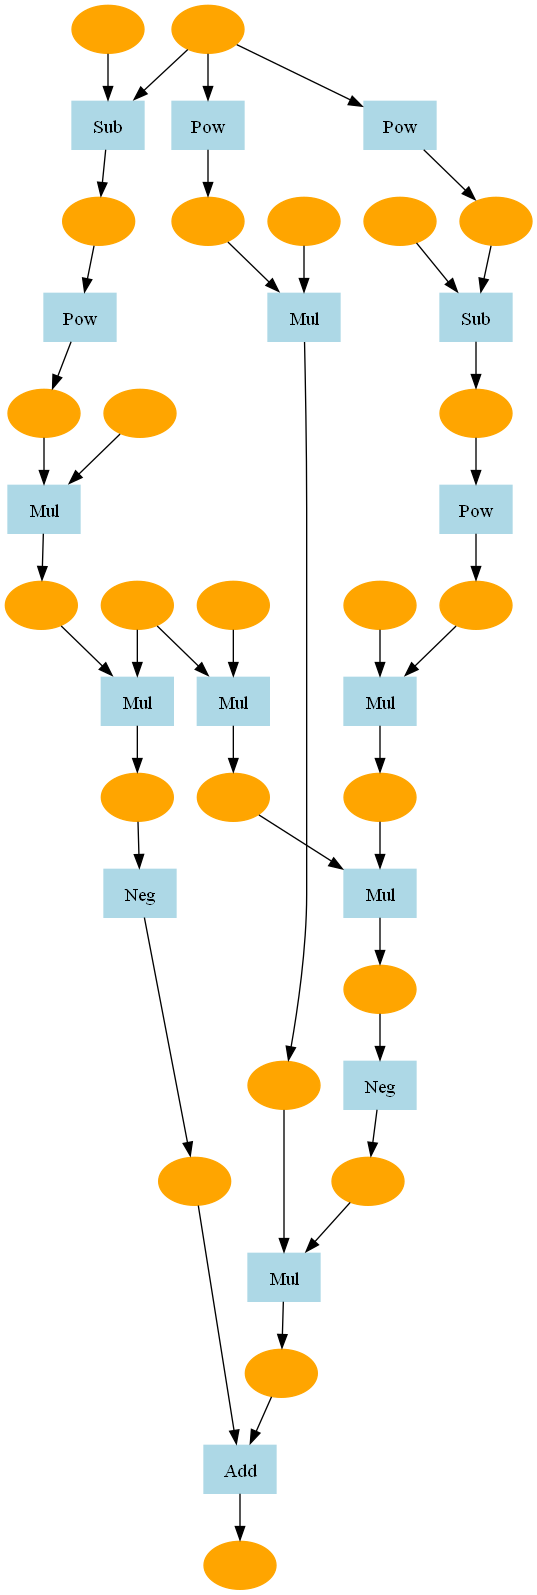

In [11]:
plot_dot_graph(gx0, verbose=False, to_file='rogen_gx0.png')

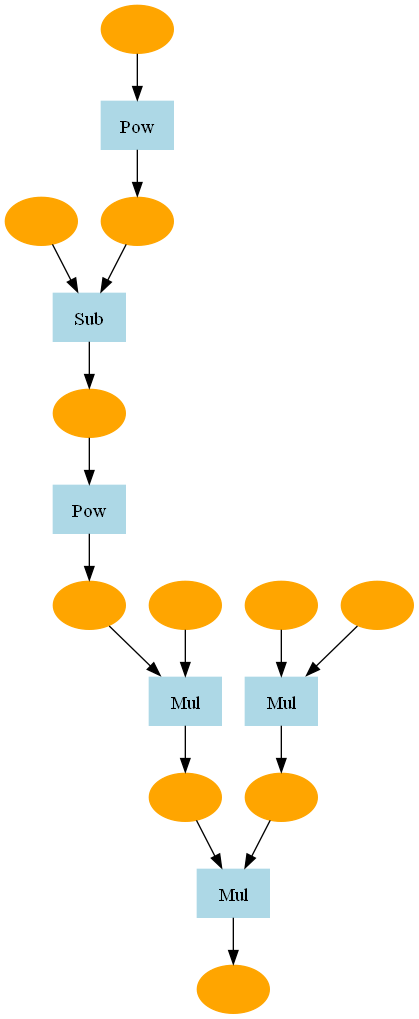

In [12]:
plot_dot_graph(gx1, verbose=False, to_file='rogen_gx1.png')